# Capstone Project - Utilizing learning models to evaluate team and player performance on MLB statistics. 

## Data Cleaning and Examination 

Baseball statistics have been kept for generation upon generations. With the plethora of data available certain metrics can be measured to determine and evaluate play of teams and individual players. The challenge in baseball is that while it is a team sport, during batting you end up with one batter versus an entire team. My original plan for this project was to use the Microsoft 'Trueskill' library to create individual player metrics of that player versus a particular opponent. However, that quickly grew outside my capabilities at this time as creating an evaluation metric for both the individual player verses the entire 9 players on the team was extremely difficult. If you do a web search for predictive models for baseball, the results are very limited, this is because baseball has so many variables. Evaluating individual player performance is difficult enough, however when you add the complexity of additional environmental factors, pitch selection, walk/K rates, just to name a few, the evaluations become increasingly complex and difficult to manage and get meaningful results from. 

In [1]:
# Importing Necessary Libraies 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [2]:
#importing data
atl_wins_df = pd.read_csv('csv_files/atl_wins.csv')
team_stats_df = pd.read_csv('csv_files/team_stats.csv')
batting_stats_df = pd.read_csv('csv_files/batting_stats.csv') 
sp_stats_df = pd.read_csv('csv_files/sp_stats.csv')

In [3]:
sp_stats_df.head()

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
0,Gerrit Cole,Astros,20,5,0,33,33,212.1,13.82,2.03,1.23,0.275,83.3%,40.3%,16.9%,2.50,2.64,2.48,7.4,13125
1,Jacob deGrom,Mets,11,8,0,32,32,204.0,11.25,1.94,0.84,0.282,81.8%,44.4%,11.2%,2.43,2.67,3.11,7.0,10954
2,Lance Lynn,Rangers,16,11,0,33,33,208.1,10.63,2.55,0.91,0.322,74.4%,40.3%,9.9%,3.67,3.13,3.85,6.8,2520
3,Max Scherzer,Nationals,11,7,0,27,27,172.1,12.69,1.72,0.94,0.321,78.7%,40.8%,11.6%,2.92,2.45,2.88,6.5,3137
4,Justin Verlander,Astros,21,6,0,34,34,223.0,12.11,1.70,1.45,0.218,88.4%,35.9%,16.0%,2.58,3.27,3.18,6.4,8700


In [4]:
sp_stats_df.corr()

,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,ERA,FIP,xFIP,WAR,playerid
W,1.000000,0.645369,NaN,0.892394,0.892394,0.926055,0.128264,-0.178127,-0.157821,-0.168759,-0.212056,-0.245129,-0.247012,0.854639,-0.204371
L,0.645369,1.000000,NaN,0.854855,0.854855,0.834478,0.016153,-0.175463,-0.097377,-0.119223,-0.175713,-0.178761,-0.191926,0.519866,-0.157495
SV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,0.892394,0.854855,NaN,1.000000,1.000000,0.984921,0.117231,-0.213440,-0.162899,-0.184550,-0.244349,-0.267251,-0.274731,0.778819,-0.197564
GS,0.892394,0.854855,NaN,1.000000,1.000000,0.984921,0.117231,-0.213440,-0.162899,-0.184550,-0.244349,-0.267251,-0.274731,0.778819,-0.197564
IP,0.926055,0.834478,NaN,0.984921,0.984921,1.000000,0.111333,-0.208566,-0.160721,-0.184109,-0.237838,-0.261609,-0.268155,0.829339,-0.194578
K/9,0.128264,0.016153,NaN,0.117231,0.117231,0.111333,1.000000,-0.119181,-0.172663,0.247946,-0.122489,-0.336133,-0.448324,0.240553,0.006019
BB/9,-0.178127,-0.175463,NaN,-0.213440,-0.213440,-0.208566,-0.119181,1.000000,0.052791,0.377381,0.609086,0.616923,0.865470,-0.166082,0.111006
HR/9,-0.157821,-0.097377,NaN,-0.162899,-0.162899,-0.160721,-0.172663,0.052791,1.000000,0.179682,0.511803,0.799696,0.314505,-0.206354,-0.039933
BABIP,-0.168759,-0.119223,NaN,-0.184550,-0.184550,-0.184109,0.247946,0.377381,0.179682,1.000000,0.589187,0.343962,0.324799,-0.137284,0.043988


In [5]:
df_atl = atl_wins_df[['Date', 'W/L', 'Win', 'Loss', 'R', 'RA']]

In [6]:
df_atl.head()

,Date,W/L,Win,Loss,R,RA
0,Thursday Mar 28,L,Nola,Teheran,4,10
1,Saturday Mar 30,L,Morgan,Parsons,6,8
2,Sunday Mar 31,L,Arrieta,Wright,1,5
3,Monday Apr 1,W,Parsons,Hendricks,8,0
4,Wednesday Apr 3,W,Jackson,Cishek,6,4


In [7]:
df_atl_wp= df_atl[['Win']]

In [8]:
df_atl_lp= df_atl[['Loss']]

In [9]:
season_df=pd.read_csv('csv_files/braves_season1.csv'
                    )

In [10]:
season_df.head()

,Rk,Gtm,Date,Unnamed: 3,Opp,Rslt,PA,AB,R,H,...,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc)
0,1,1,Mar 28,@,PHI,L4-10,36,30,4,7,...,1,1,0.233,0.361,0.367,0.728,5,15,R,A.Nola(67)
1,2,2,Mar 30,@,PHI,L6-8,40,36,6,10,...,1,0,0.258,0.355,0.470,0.825,7,17,R,N.Pivetta(35)
2,3,3,Mar 31,@,PHI,L1-5,36,29,1,4,...,1,2,0.221,0.339,0.368,0.708,8,14,R,J.Arrieta(62)
3,4,4,Apr 1,NaN,CHC,W8-0,43,36,8,12,...,0,0,0.252,0.368,0.427,0.795,11,15,R,K.Hendricks(26)
4,5,5,Apr 3,NaN,CHC,W6-4,39,30,6,8,...,1,0,0.255,0.376,0.441,0.817,9,16,L,J.Lester(56)


In [11]:
df_atl

,Date,W/L,Win,Loss,R,RA
0,Thursday Mar 28,L,Nola,Teheran,4,10
1,Saturday Mar 30,L,Morgan,Parsons,6,8
2,Sunday Mar 31,L,Arrieta,Wright,1,5
3,Monday Apr 1,W,Parsons,Hendricks,8,0
4,Wednesday Apr 3,W,Jackson,Cishek,6,4
...,...,...,...,...,...,...
157,Tuesday Sep 24,L,Duffy,Teheran,6,9
158,Wednesday Sep 25,W,Jackson,Barnes,10,2
159,Friday Sep 27,L,Stroman,Keuchel,2,4
160,Saturday Sep 28,L,Matz,Foltynewicz,0,3


In [12]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 32 columns):
Rk                      162 non-null int64
Gtm                     162 non-null int64
Date                    162 non-null object
Unnamed: 3              81 non-null object
Opp                     162 non-null object
Rslt                    162 non-null object
PA                      162 non-null int64
AB                      162 non-null int64
R                       162 non-null int64
H                       162 non-null int64
2B                      162 non-null int64
3B                      162 non-null int64
HR                      162 non-null int64
RBI                     162 non-null int64
BB                      162 non-null int64
IBB                     162 non-null int64
SO                      162 non-null int64
HBP                     162 non-null int64
SH                      162 non-null int64
SF                      162 non-null int64
ROE                     162 non-

In [13]:
print(season_df.isnull().sum(axis=0))

Rk                       0
Gtm                      0
Date                     0
Unnamed: 3              81
Opp                      0
Rslt                     0
PA                       0
AB                       0
R                        0
H                        0
2B                       0
3B                       0
HR                       0
RBI                      0
BB                       0
IBB                      0
SO                       0
HBP                      0
SH                       0
SF                       0
ROE                      0
GDP                      0
SB                       0
CS                       0
BA                       0
OBP                      0
SLG                      0
OPS                      0
LOB                      0
#                        0
Thr                      0
Opp. Starter (GmeSc)     0
dtype: int64


There were numerous unused columns in the data so those were removed. 

In [14]:
season_df[['Rslt']] = season_df['Rslt'].str.slice(stop=1)

In [15]:
season_df[['Rslt']] = season_df['Rslt'].map({'W':1, 'L':0})

The above lines of code were used to reassign a win/loss column into a binary data set of 1 and 0. 

In [16]:
data_df = season_df.drop(['Rk', 'CS', 'HBP', 'Gtm', 'OBP', 'SF', 'SH', '#', 'Unnamed: 3', 'GDP', 'LOB', 'Thr'], axis=1)

In [17]:
data_df.head()

,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc)
0,Mar 28,PHI,0,36,30,4,7,1,0,1,4,6,0,9,0,1,0.233,0.367,0.728,A.Nola(67)
1,Mar 30,PHI,0,40,36,6,10,2,1,2,6,4,0,9,0,1,0.258,0.470,0.825,N.Pivetta(35)
2,Mar 31,PHI,0,36,29,1,4,0,0,0,0,6,0,8,0,1,0.221,0.368,0.708,J.Arrieta(62)
3,Apr 1,CHC,1,43,36,8,12,3,0,2,6,7,1,9,2,0,0.252,0.427,0.795,K.Hendricks(26)
4,Apr 3,CHC,1,39,30,6,8,1,0,2,6,8,0,8,0,1,0.255,0.441,0.817,J.Lester(56)


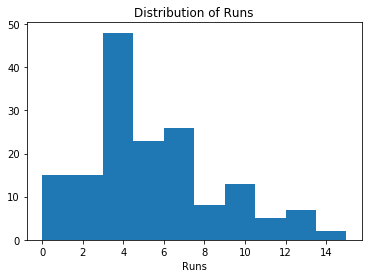

Mean Runs/Game: 5.277777777777778


In [18]:
plt.hist(data_df['R'])
plt.xlabel('Runs')
plt.title('Distribution of Runs')
plt.show()
print('Mean Runs/Game:', data_df['R'].mean())

In baseball runs are the critical component needed to win the game, thus the more runs scored the better your chance of winning. So here we are looking at the distribution of runs over the course of a 162 game season for the 2019 Atlanta Braves baseball club. 

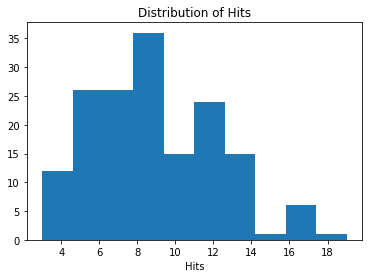

Mean Hits/Game: 5.277777777777778


In [19]:
plt.hist(data_df['H'])
plt.xlabel('Hits')
plt.title('Distribution of Hits')
plt.show()
print('Mean Hits/Game:', data_df['R'].mean())

Other than a few outside cases, Hits are the primary way runs are scored so in addition to examining runs here are the distribution of hits for the same team. 

In [20]:
data_df.corr()

,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,ROE,SB,BA,SLG,OPS
Rslt,1.000000,0.269803,0.129982,0.548318,0.355936,0.205820,0.083166,0.289796,0.535478,0.308701,0.140351,-0.162777,0.173768,-0.116501,0.127391,0.121474,0.094293
PA,0.269803,1.000000,0.877000,0.599209,0.709785,0.383936,0.100949,0.169528,0.589614,0.514122,0.291550,0.233981,0.173255,0.129518,0.100660,0.043841,0.070843
AB,0.129982,0.877000,1.000000,0.484857,0.733373,0.329213,0.078892,0.199611,0.484252,0.078508,0.136570,0.258234,0.130584,0.114511,0.170863,0.090321,0.052761
R,0.548318,0.599209,0.484857,1.000000,0.774343,0.455147,0.072365,0.544756,0.991613,0.372915,0.092160,-0.103059,0.207447,-0.081354,0.182873,0.131024,0.142919
H,0.355936,0.709785,0.733373,0.774343,1.000000,0.495860,0.083361,0.335609,0.775630,0.148335,0.149712,-0.106716,0.089679,-0.051979,0.244993,0.125503,0.165119
2B,0.205820,0.383936,0.329213,0.455147,0.495860,1.000000,0.061796,0.061013,0.455415,0.166559,0.209596,-0.138127,0.020772,-0.072087,0.180913,0.157425,0.170603
3B,0.083166,0.100949,0.078892,0.072365,0.083361,0.061796,1.000000,-0.096584,0.072967,0.058190,-0.060465,0.138994,-0.003269,0.052943,-0.022348,-0.027855,-0.011065
HR,0.289796,0.169528,0.199611,0.544756,0.335609,0.061013,-0.096584,1.000000,0.550873,0.055115,-0.150084,0.011970,0.146143,-0.078356,0.141024,0.183808,0.128324
RBI,0.535478,0.589614,0.484252,0.991613,0.775630,0.455415,0.072967,0.550873,1.000000,0.352128,0.077828,-0.101397,0.178852,-0.084513,0.208056,0.150449,0.157150
BB,0.308701,0.514122,0.078508,0.372915,0.148335,0.166559,0.058190,0.055115,0.352128,1.000000,0.341167,0.038716,0.120792,0.078883,-0.107064,-0.040248,0.065922


Examining the correlation table, we want to look at what factors lead to a positive trend within the Results column, Runs, RBI, Hits are all the largest trending columns so below we created a bin system for identifying games with lots of hits which presumably would lead to lots of runs. 

In [21]:
def assign_bins_Hits(H): 
    if H <4 :
        return 1
    if H >= 4: 
        return 2
    if H >= 6:
        return 3
    if H >= 8:
        return 4
    if H >= 10: 
        return 5
    if H >= 12: 
        return 6
    if H >= 14: 
        return 7
    
data_df['hit_bins'] = data_df['H'].apply(assign_bins_Hits)

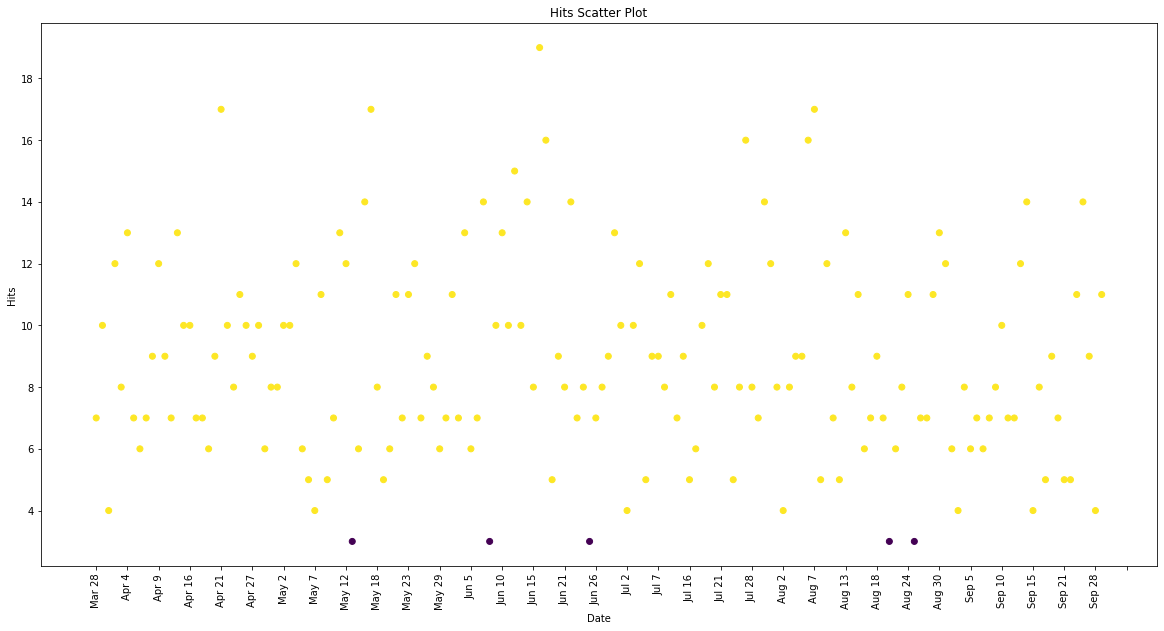

In [22]:
plt.rcParams["figure.figsize"]=20,10
x_ticks = np.arange(0, 250, 5)
plt.xticks(x_ticks)
plt.xticks(rotation=90)
plt.scatter(data_df['Date'], data_df['H'], c=data_df['hit_bins'])
plt.title('Hits Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Hits')
plt.show()

Based on the plot above one can presume that the games with the fewest hits were losses while the ones with lots of hits are usually wins. Certain 'hot streak' trends can also be observed where everyone on the team was hitting well thus proving lots of offensive output. Just to examine potential streaks further we split the date column down to months, to see if there were any turning points in 2019 where the team had lots of success and vice-versa where the team was cold and unproductive 

In [23]:
data_df[['Date']] = data_df['Date'].str.slice(stop=3)

In [24]:
data_df.head()

,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,...,BB,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc),hit_bins
0,Mar,PHI,0,36,30,4,7,1,0,1,...,6,0,9,0,1,0.233,0.367,0.728,A.Nola(67),2
1,Mar,PHI,0,40,36,6,10,2,1,2,...,4,0,9,0,1,0.258,0.470,0.825,N.Pivetta(35),2
2,Mar,PHI,0,36,29,1,4,0,0,0,...,6,0,8,0,1,0.221,0.368,0.708,J.Arrieta(62),2
3,Apr,CHC,1,43,36,8,12,3,0,2,...,7,1,9,2,0,0.252,0.427,0.795,K.Hendricks(26),2
4,Apr,CHC,1,39,30,6,8,1,0,2,...,8,0,8,0,1,0.255,0.441,0.817,J.Lester(56),2


In [25]:
winning_df = data_df[data_df.Rslt != 0]


In [26]:
winning_df.head()


,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,...,BB,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc),hit_bins
3,Apr,CHC,1,43,36,8,12,3,0,2,...,7,1,9,2,0,0.252,0.427,0.795,K.Hendricks(26),2
4,Apr,CHC,1,39,30,6,8,1,0,2,...,8,0,8,0,1,0.255,0.441,0.817,J.Lester(56),2
5,Apr,CHC,1,42,34,9,13,4,0,0,...,6,1,6,0,0,0.277,0.451,0.843,Y.Darvish(38),2
6,Apr,MIA,1,34,31,4,7,0,0,2,...,2,0,8,0,0,0.270,0.447,0.826,P.Lopez(41),2
8,Apr,MIA,1,33,29,4,7,1,0,2,...,3,0,8,0,0,0.256,0.426,0.795,C.Smith(57),2


Since we split the date down to months, we again split the table into a table that only contained statistics about wins, this was we can create a bins table that examines team performance on a month-by-month basis. 

In [27]:

winning_df['Date'].value_counts()

Jun    20
Aug    19
May    16
Sep    14
Jul    14
Apr    14
Name: Date, dtype: int64

From this we can see that June and August were the best months while July and April were the worst in terms of team victories. It difficult to determine the cause for this, but keeping a 25 man roster health while playing an intense sport almost every day can be a factor. 

In [28]:
data_df.mean()

Rslt         0.598765
PA          38.901235
AB          34.320988
R            5.277778
H            8.839506
2B           1.709877
3B           0.179012
HR           1.537037
RBI          5.086420
BB           3.820988
IBB          0.240741
SO           9.055556
ROE          0.314815
SB           0.549383
BA           0.261333
SLG          0.451302
OPS          0.793025
hit_bins     1.969136
dtype: float64

In [29]:
june_df= data_df[data_df.Date == 'Jun']


In [30]:
june_df.mean()

Rslt         0.714286
PA          40.285714
AB          35.750000
R            6.678571
H            9.892857
2B           2.285714
3B           0.214286
HR           2.000000
RBI          6.464286
BB           3.571429
IBB          0.178571
SO           8.928571
ROE          0.321429
SB           0.500000
BA           0.261750
SLG          0.451750
OPS          0.787786
hit_bins     1.928571
dtype: float64

To better dig into this we look at the mean values of the best month, June, versus the entire season, in this you can see that during the month of June players averages more at-bats, AB, and more RBIs so basically the entire team was performing roughly 78% better at driving in runs. 

In [31]:
data_df.columns

Index(['Date', 'Opp', 'Rslt', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'ROE', 'SB', 'BA', 'SLG', 'OPS',
       'Opp. Starter (GmeSc)', 'hit_bins'],
      dtype='object')

In [32]:

data_df[['Opp. Starter (GmeSc)']] = data_df['Opp. Starter (GmeSc)'].str.slice(stop=-4)

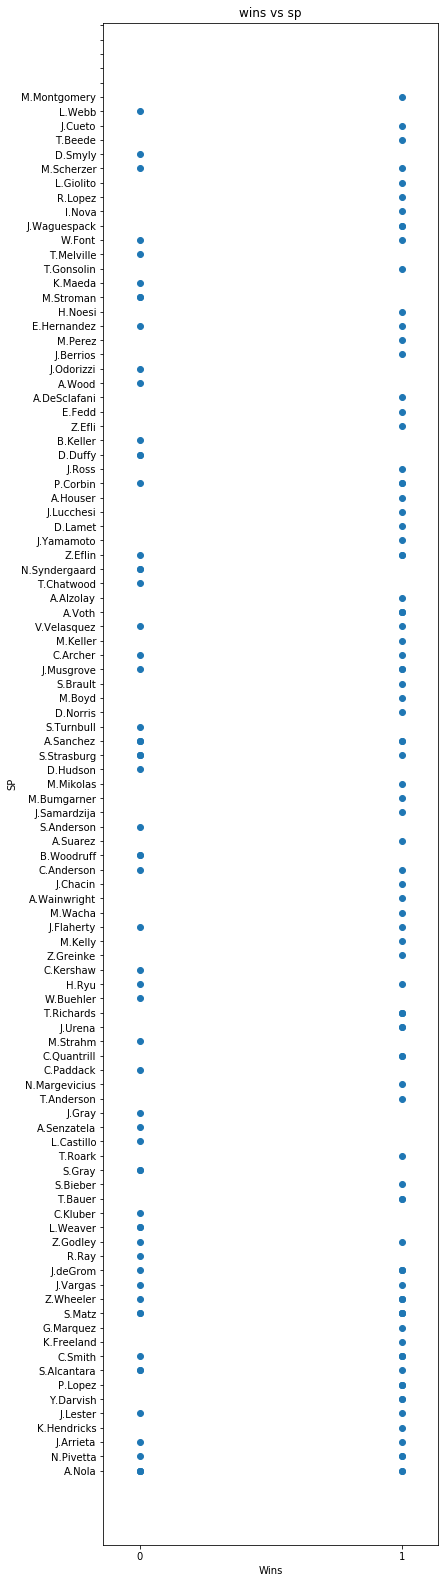

In [33]:
plt.rcParams["figure.figsize"]=6,28
plt.xticks(rotation=0)
plt.figsize=(30,6)
x_ticks = np.arange(0, 10, 1)
plt.xticks(x_ticks)
y_ticks = np.arange(0, 162, 1)
plt.yticks(y_ticks)
plt.scatter(data_df['Rslt'], data_df['Opp. Starter (GmeSc)'])
plt.title('wins vs sp')
plt.xlabel('Wins')
plt.ylabel('SP')
plt.show()

In [34]:
repeat_sp = data_df['Opp. Starter (GmeSc)'].value_counts()

In [35]:
repeat_sp.to_frame()


,Opp. Starter (GmeSc)
S.Matz,6
A.Nola,6
A.Sanchez,5
C.Smith,4
S.Strasburg,4
...,...
J.Chacin,1
M.Keller,1
M.Wacha,1
M.Strahm,1


The above tables were more of a curioucity than a valid statistical argument, we wanted to examine which pitchers the braves had faced and either won or lost against them as well as the number of times the team faced those particular starting pitchers. 

## Modeling team wins 

In [37]:
attributes = ['PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'ROE', 'SB', 'BA', 'SLG', 'OPS',
       ]
data_attributes = data_df[attributes]

In [38]:
data_attributes.head()

,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,ROE,SB,BA,SLG,OPS
0,36,30,4,7,1,0,1,4,6,0,9,0,1,0.233,0.367,0.728
1,40,36,6,10,2,1,2,6,4,0,9,0,1,0.258,0.470,0.825
2,36,29,1,4,0,0,0,0,6,0,8,0,1,0.221,0.368,0.708
3,43,36,8,12,3,0,2,6,7,1,9,2,0,0.252,0.427,0.795
4,39,30,6,8,1,0,2,6,8,0,8,0,1,0.255,0.441,0.817


Above we simplified our data to include only numberical and measurable statistics. 

In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.37323342067247944], 3: [0.24389079126638932], 4: [0.24842518324443108], 5: [0.19799516781766885], 6: [0.1858559843634031], 7: [0.1759530192024783], 8: [0.1762241218391131], 9: [0.18000272671122614], 10: [0.17971428134643203]}


After lots of testing and consideration of the data KMeans was chosen as a model due to its ability to evaluate continues float data and create continuous means of the data points selected. 

Text(0.5, 1.0, 'Kmeans Clusters')

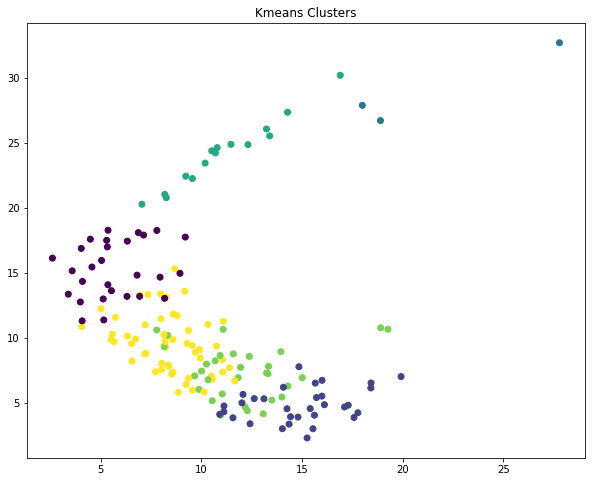

In [40]:
plt.rcParams["figure.figsize"]=10,8
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

In [41]:
data_df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
data_df.head()

,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,...,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc),hit_bins,labels
0,Mar,PHI,0,36,30,4,7,1,0,1,...,0,9,0,1,0.233,0.367,0.728,A.Nola,2,4
1,Mar,PHI,0,40,36,6,10,2,1,2,...,0,9,0,1,0.258,0.470,0.825,N.Pivetta,2,5
2,Mar,PHI,0,36,29,1,4,0,0,0,...,0,8,0,1,0.221,0.368,0.708,J.Arrieta,2,1
3,Apr,CHC,1,43,36,8,12,3,0,2,...,1,9,2,0,0.252,0.427,0.795,K.Hendricks,2,0
4,Apr,CHC,1,39,30,6,8,1,0,2,...,0,8,0,1,0.255,0.441,0.817,J.Lester,2,4


In [133]:
num_cols = ['PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'ROE', 'SB', 'BA', 'SLG', 'OPS', 'labels', 'Rslt'
       ]
data=data_df[num_cols]

train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['Rslt']
x_test = test[attributes]
y_test = test['Rslt']

Here we are creating a model to determine our ability to predict the result based on the data provided throughout a season and determine if give the provided data a model can be created to accurately predict the result of a particular given game. 

In [134]:
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mean absolute error' 
print(mae)
print(predictions)

0.3922009257092688
[ 0.63880199  0.92926195  0.5543073   0.46710779  0.83530545  0.49487821
  0.82332197  0.60255316  0.24451183  0.16953551  0.81868119 -0.24077974
  1.1066538   0.48950692  0.17629844  0.36114219  0.89343522  0.64548067
  1.48430622  1.33328704  0.37423865  0.82605636  0.46110203  0.14906376
  1.07885472  0.73101191  0.38620497 -0.82707437  0.22169401  0.79054386
  1.18161317  0.55069677  0.97755823  0.3867639   0.68690898  0.7968166
  0.79825573  0.57832276  0.66558962  0.73504176]


In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.  At 39% MAE, the model is by no means refined. Below we cross validate the results with RidgeCV with a similar output, confidence in predicting outcomes with the provided data is just not going to be accurate enough. Thus below we enter the second portion of the project, to predict particular player value as opposed to team value. 

In [135]:
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

0.39717158914083306


# PART II: Evaluating player value using WAR

In part 2 we are going to look at individual player performance league wide from the same time series, 2019, and examine the totality of their statistics over that given time-frame. In this data we have a ton of statistical metrics to look at and compare, but mostly we will focus on WAR. We will provide a more in dept description of war in writeup below. 

In [45]:
batting_stats_df.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Mike Trout,Angels,134,600,45,110,104,11,18.3%,20.0%,...,0.291,0.438,0.645,0.436,180,7.1,68.2,-0.3,8.6,10155
1,Alex Bregman,Astros,156,690,41,122,112,5,17.2%,12.0%,...,0.296,0.423,0.592,0.418,168,-2.1,58.2,4.8,8.5,17678
2,Christian Yelich,Brewers,130,580,44,100,97,30,13.8%,20.3%,...,0.329,0.429,0.671,0.442,174,8.5,65.2,-3.9,7.8,11477
3,Cody Bellinger,Dodgers,156,660,47,121,115,15,14.4%,16.4%,...,0.305,0.406,0.629,0.415,162,1.4,55.3,3.4,7.8,15998
4,Marcus Semien,Athletics,162,747,33,123,92,10,11.6%,13.7%,...,0.285,0.369,0.522,0.373,137,1.7,37.5,14.1,7.6,12533


In [46]:
batting_stats_df.columns

Index(['Name', 'Team', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%', 'K%', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def',
       'WAR', 'playerid'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of WAR')

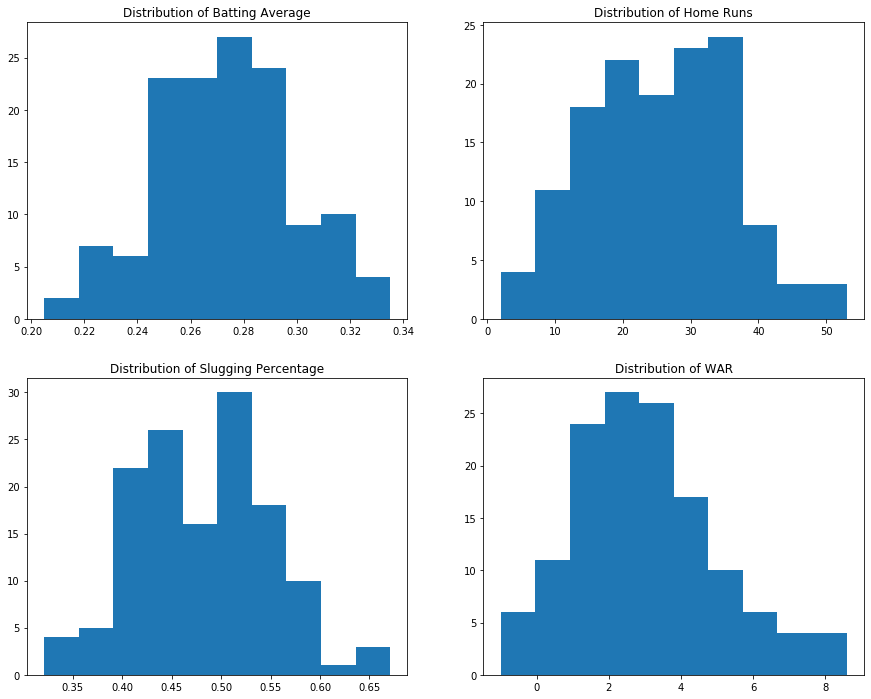

In [136]:
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Create distribution plots for Hits, Home Runs, Years Played and All Star Games
ax1.hist(batting_stats_df['AVG'])
ax1.set_title('Distribution of Batting Average')

ax2.hist(batting_stats_df['HR'])
ax2.set_title('Distribution of Home Runs')
ax3.hist(batting_stats_df['SLG'])
ax3.set_title('Distribution of Slugging Percentage')
ax4.hist(batting_stats_df['WAR'])
ax4.set_title('Distribution of WAR')

Here we created a number of distribution plots to examine some of the most popular offensive statistics, Batting average, Home Run totals, WAR, and Slugging percentage. 

Text(0, 0.5, 'Slugging%')

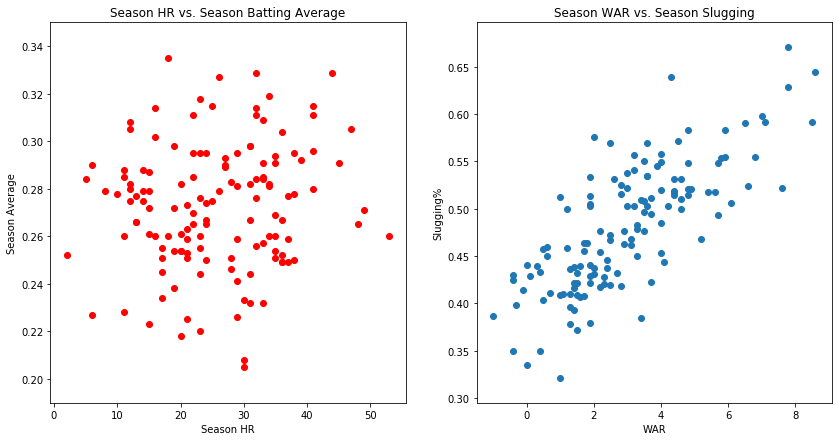

In [48]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Create Scatter plots for Hits vs. Average and Home Runs vs. Average
ax1.scatter(batting_stats_df['HR'], batting_stats_df['AVG'], c='r', label='Top Player')
ax1.set_title('Season HR vs. Season Batting Average')
ax1.set_xlabel('Season HR')
ax1.set_ylabel('Season Average')
ax2.scatter(batting_stats_df['WAR'], batting_stats_df['SLG'])
ax2.set_title('Season WAR vs. Season Slugging')
ax2.set_xlabel('WAR')
ax2.set_ylabel('Slugging%')

As seen in the above scatter plots, average and HR total are not necissarily correlated, as players can hit for power without average and inversely can hit for average with limited power. To see a clearer picture of this we can adjust the output to see slugging percentage which takes into account weighted power, compared to WAR, or a players wins against the league average player at a given position. 

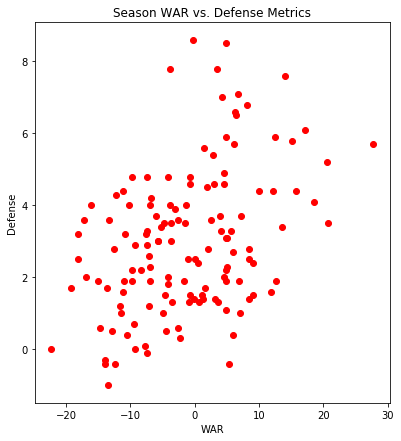

In [128]:
fig = plt.figure(figsize=(14, 7))
ax4 = fig.add_subplot(1,2,1)
ax4.scatter(batting_stats_df['Def'], batting_stats_df['WAR'], c='r')
ax4.set_title('Season WAR vs. Defense Metrics')
ax4.set_xlabel('WAR')
ax4.set_ylabel('Defense')
plt.show()

Wins Above Replacement (WAR)
Definition

WAR measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position (e.g., a Minor League replacement or a readily available fill-in free agent).

For example, if a shortstop and a first baseman offer the same overall production (on offense, defense and the basepaths), the shortstop will have a better WAR because his position sees a lower level of production from replacement-level players.
The formula

For position players: (The number of runs above average a player is worth in his batting, baserunning and fielding + adjustment for position + adjustment for league + the number of runs provided by a replacement-level player) / runs per win

For pitchers: Different WAR computations use either RA9 or FIP. Those numbers are adjusted for league and ballpark. Then, using league averages, it is determined how many wins a pitcher was worth based on those numbers and his innings pitched total.

Note: fWAR refers to Fangraphs' calculation of WAR. bWAR or rWAR refer to Baseball-Reference's calculation. And WARP refers to Baseball Prospectus' statistic "Wins Above Replacement Player." The calculations differ slightly -- for instance, fWAR uses FIP in determining pitcher WAR, while bWAR uses RA9. But all three stats answer the same question: How valuable is a player in comparison to replacement level?
Why it's useful

WAR quantifies each player's value in terms of a specific numbers of wins. And because WAR factors in a positional adjustment, it is well suited for comparing players who man different defensive positions.


In [109]:
data=batting_stats_df.drop(['Name', 'Team', 'playerid', 'BB%', 'K%', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'ISO'], axis=1)
data.dropna()

,G,PA,HR,R,RBI,SB,wRC+,BsR,Off,Def,WAR
0,134,600,45,110,104,11,180,7.1,68.2,-0.3,8.6
1,156,690,41,122,112,5,168,-2.1,58.2,4.8,8.5
2,130,580,44,100,97,30,174,8.5,65.2,-3.9,7.8
3,156,660,47,121,115,15,162,1.4,55.3,3.4,7.8
4,162,747,33,123,92,10,137,1.7,37.5,14.1,7.6
...,...,...,...,...,...,...,...,...,...,...,...
130,136,549,12,41,59,0,96,-6.3,-8.9,-13.9,-0.3
131,160,667,22,72,99,0,91,-5.2,-13.1,-12.4,-0.4
132,131,545,23,55,93,3,93,-4.4,-9.3,-13.9,-0.4
133,152,546,15,51,59,8,61,0.9,-27.3,5.4,-0.4


In [110]:
data_int= data.astype(int)

For the below model we have decided to stay within the Sklean library, it is powerful and lightweight and allows us to utilize out data to create an itemized table to predict a give war value. 

In [111]:
#importing additional libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [112]:
#defining train/test data
y = data_int['WAR']
X = data_int.drop(columns=['WAR'], axis=1)

In [119]:
#Normalization of data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)

In [114]:
# Test train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [115]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)
# Running our regression model


In [117]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    67
1    17
2    14
3     2
4     1
Name: WAR, dtype: int64
------------------------------------
0    0.663366
1    0.168317
2    0.138614
3    0.019802
4    0.009901
Name: WAR, dtype: float64


As seen here for our positive war values, the prediction confidence for each WAR bucket decreases as the accuracy greatly decreased for higher war players in both the training and test set. This is most likely due to the fact that of all qualifying players less than 1% achive a war greater than 5, so with so many variable attributing to these outlier performances a player has to have an absolutely absurdly high performing season to hit these benchmarks. Overall this project was successful in determining the difficulty in building viable models to predict outcomes of games, which when you parlay that information with actual baseball games this is not surprising. Many seasons have been won or lost on a single play. On average a 3 hour baseball game has only 8 minutes of live ball play, which only goes to show the statistical importance a single play can have on a team and individual players statistics. Moving forward I would like to expand on this model and hopefully with the support I Have requested from Microsoft on getting their 'TrueSkill' model to work I can add that as an additional factor to improve the accuracy of player performance metrics. 

In [118]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

1    13
2     7
0     6
3     5
4     2
5     1
Name: WAR, dtype: int64
------------------------------------
1    0.382353
2    0.205882
0    0.176471
3    0.147059
4    0.058824
5    0.029412
Name: WAR, dtype: float64
